In [1]:
import neo
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import kurtosis
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns

## Load data

In [2]:
## Loadning of data
### 2D data
# List of filenames for each eye
filenames_2D = [
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms005.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/10Hz_1V_neg500mV_1ms.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/10Hz_1V_neg500mV_1ms002.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/10Hz_1V_neg500mV_1ms005.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_2D = []
filtered_data = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_2D:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_2D.append(data_SA)

all_data_2D = np.array(all_data_2D)
all_data_2D = np.transpose(all_data_2D, (0, 2, 1)) 
average_per_eye_2D = np.mean(all_data_2D, axis=1)


# List of filenames for each eye
filenames_2D_TTX = [
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms_TTX006.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms_TTX008.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms_TTX008.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/10Hz_1V_neg500mV_1ms_TTX001.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/10Hz_1V_neg500mV_1ms_TTX003.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/10Hz_1V_neg500mV_1ms_TTX006.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_2D_TTX = []
average_per_eye_2D_TTX = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_2D_TTX:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_2D_TTX.append(data_SA[:300300])

all_data_2D_TTX = np.array(all_data_2D_TTX)
all_data_2D_TTX = np.transpose(all_data_2D_TTX, (0, 2, 1)) 
average_per_eye_2D_TTX = np.mean(all_data_2D_TTX, axis=1)

# List of filenames for each eye
filenames_2D_no_stim = [
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/NO_STIM_NO_GEN004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/NO_STIM_NO_GEN006.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/NO_STIM_NO_GEN006.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/NO_STIM_NO_GEN001.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/NO_STIM_NO_GEN001.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/NO_STIM_NO_GEN004.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_2D_no_stim = []
filtered_data = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_2D_no_stim:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_2D_no_stim.append(data_SA)

all_data_2D_no_stim = np.array(all_data_2D_no_stim)
all_data_2D_no_stim = np.transpose(all_data_2D_no_stim, (0, 2, 1)) 
average_per_eye_2D_no_stim = np.mean(all_data_2D_no_stim, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_2D_no_stim)}")
print(f"Data shape: {np.shape(average_per_eye_2D_no_stim)}")



### 3D data
# List of filenames for each eye
filenames_3D = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms002.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms018.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms011.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_3D = []
filtered_data = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_3D:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_3D.append(data_SA)

all_data_3D = np.array(all_data_3D)
all_data_3D = np.transpose(all_data_3D, (0, 2, 1)) 
average_per_eye_3D = np.mean(all_data_3D, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_3D)}")
print(f"Data shape: {np.shape(average_per_eye_3D)}")

# List of filenames for each eye
filenames_3D_TTX = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms_TTX007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms_TTX004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms_TTX007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms_TTX020.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms_TTX005.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms_TTX012.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_3D_TTX = []
filtered_data_TTX = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_3D_TTX:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_3D_TTX.append(data_SA)

all_data_3D_TTX = np.array(all_data_3D_TTX)
all_data_3D_TTX = np.transpose(all_data_3D_TTX, (0, 2, 1)) 
average_per_eye_3D_TTX = np.mean(all_data_3D_TTX, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_3D_TTX)}")
print(f"Data shape: {np.shape(average_per_eye_3D_TTX)}")

# List of filenames for each eye
filenames_3D_no_stim = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/NO_STIM_NO_GEN002.ns5.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/NO_STIM_NO_GEN001.ns5.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/NO_STIM_NO_GEN001.ns5.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/NO_STIM_NO_GEN016.ns5.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/NO_STIM_NO_GEN001.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/NO_STIM_NO_GEN007.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_3D_no_stim = []
filtered_data_no_stim = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_3D_no_stim:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_3D_no_stim.append(data_SA)

all_data_3D_no_stim = np.array(all_data_3D_no_stim)
all_data_3D_no_stim = np.transpose(all_data_3D_no_stim, (0, 2, 1)) 
average_per_eye_3D_no_stim = np.mean(all_data_3D_no_stim, axis=1)



Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms005.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms007.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms007.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/10Hz_1V_neg500mV_1ms.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/10Hz_1V_neg500mV_1ms002.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/10Hz_1V_neg500mV_1ms005.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms_TTX006.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms_TTX008.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms_TTX008.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all dat

## Make plot

In [4]:
# Function to plot data for a specific eye and channel
def plot_data(all_data, eye_index, channel_index, start, end):
    # Extract the specified data
    data_to_plot = all_data[eye_index, channel_index, start:end]
    
    # Create the time axis for the x-axis
    time_axis = np.arange(start, end)

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(time_axis, data_to_plot, label=f'Eye: {eye_index+1}, Channel: {channel_index+1}')
    plt.title(f'Data for Eye {eye_index+1} and Channel {channel_index+1}', fontsize=16)
    plt.xlabel('Time Points', fontsize=14)
    plt.ylabel('Amplitude', fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

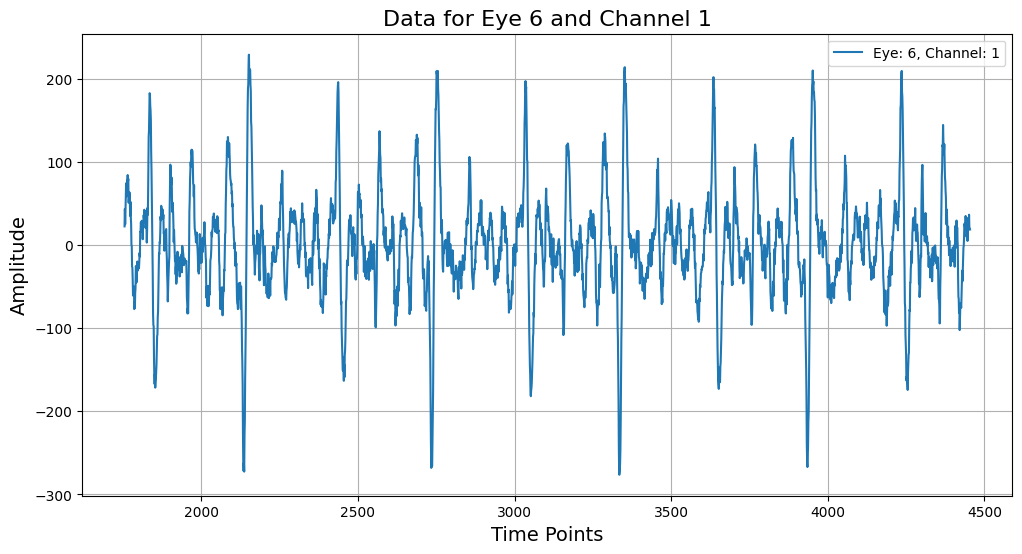

In [6]:
eye_index = 5
channel_index = 0
offset = 3000
sa_length = 2700
start = 1455 + 300
end = start + sa_length
no_sa = 100 

plot_data(all_data_3D, eye_index, channel_index, start, end)

In [7]:
def collect_and_average_segments(all_data, eye_index, start, sa_length, offset, no_sa):
    scaler = StandardScaler()
    data_std = scaler.fit_transform(all_data[eye_index].T).T

    data = abs(data_std)
    
    # Create a list to store the average artifact for each channel
    average_artifacts_per_channel = []
    
    for channel in range(data.shape[0]):
        channel_data = data[channel]
        sa = []
        
        for i in range(no_sa):
            end_index = start + sa_length + i * offset
            if end_index <= len(channel_data):
                sa.append(channel_data[start + i * offset: end_index])
            else:
                print(f"Skipping channel {channel}, artifact {i}: Out of bounds (end_index={end_index})")
        
        sa = np.array(sa)
        average_artifact = sa.mean(axis=0)
        average_artifacts_per_channel.append(average_artifact)

    average_artifacts_per_channel = np.array(average_artifacts_per_channel)
    
    return average_artifacts_per_channel


def plot_average_segment(stimulation_artifacts_per_channel, sampling_rate=30000):
    n_channels, sa_length = stimulation_artifacts_per_channel.shape
    time = np.arange(0, sa_length) / sampling_rate  # Time axis in seconds


    plt.figure(figsize=(12, 6))
    

    colormap = cm.get_cmap('magma', n_channels)

    for channel in range(n_channels):
        color = colormap(channel / n_channels)
        plt.plot(time, stimulation_artifacts_per_channel[channel], label=f'Channel {channel+1}', color=color, linewidth=1)


    plt.title(f"Average of 100 Stimulation Artifacts for Eye 6 for All Channels for data with stimulation", fontsize=16)
    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('Voltage (mV)', fontsize=14) 
    plt.grid(True)
    
    plt.legend(loc='upper right', fontsize=8, ncol=4)  # Adjust legend if too cluttered
    
    plt.show()



Skipping channel 0, artifact 99: Out of bounds (end_index=301455)
Skipping channel 1, artifact 99: Out of bounds (end_index=301455)
Skipping channel 2, artifact 99: Out of bounds (end_index=301455)
Skipping channel 3, artifact 99: Out of bounds (end_index=301455)
Skipping channel 4, artifact 99: Out of bounds (end_index=301455)
Skipping channel 5, artifact 99: Out of bounds (end_index=301455)
Skipping channel 6, artifact 99: Out of bounds (end_index=301455)
Skipping channel 7, artifact 99: Out of bounds (end_index=301455)
Skipping channel 8, artifact 99: Out of bounds (end_index=301455)
Skipping channel 9, artifact 99: Out of bounds (end_index=301455)
Skipping channel 10, artifact 99: Out of bounds (end_index=301455)
Skipping channel 11, artifact 99: Out of bounds (end_index=301455)
Skipping channel 12, artifact 99: Out of bounds (end_index=301455)
Skipping channel 13, artifact 99: Out of bounds (end_index=301455)
Skipping channel 14, artifact 99: Out of bounds (end_index=301455)
Skipp

/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_52980/3478794851.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('magma', n_channels)


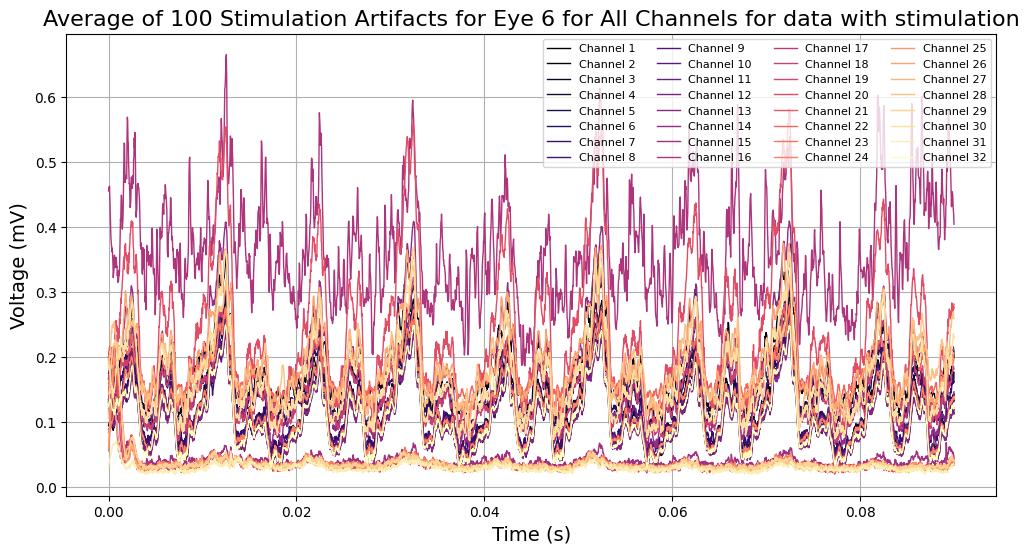

In [8]:
# Collect and average the stimulation artifacts
segments = collect_and_average_segments(all_data_3D, eye_index, start, sa_length, offset, no_sa)
# Plot the averaged stimulation artifact
plot_average_segment(segments)

In [11]:
def plot_average_all_eyes(segments_all_eyes, sampling_rate=30000):
    plt.figure(figsize=(12, 6))
    
    # Generate distinct colormaps for each eye
    n_eyes = len(segments_all_eyes)
    colormap = cm.get_cmap('tab10', n_eyes)  # tab10 has distinct colors, useful for multiple eyes
    
    time = None
    
    # Loop over each eye's data and plot
    for eye_index, sa_per_channel in enumerate(segments_all_eyes):
        n_channels, sa_length = sa_per_channel.shape
        time = np.arange(0, sa_length) / sampling_rate  # Time axis in seconds
        
        # Calculate mean and standard deviation for the current eye across channels
        mean_sa = sa_per_channel.mean(axis=0)
        std_sa = sa_per_channel.std(axis=0)
        
        # Get a distinct color for each eye
        eye_color = colormap(eye_index)
        
        # Plot the mean SA for the eye with label
        plt.plot(time, mean_sa, color=eye_color, label=f'Eye {eye_index+1}', linewidth=2)
        
        # Plot the standard deviation as a shaded region (no label for fill_between)
        plt.fill_between(time, mean_sa - std_sa, mean_sa + std_sa, color=eye_color, alpha=0.2)
        
        # Add a linear trend line (fit a line to the mean values)
        trend = np.polyfit(time, mean_sa, 1)  # Fit a linear trend (degree=1)
        trend_line = np.polyval(trend, time)  # Evaluate the linear trend
        
        # Plot the trend line on top of the mean line
        plt.plot(time, trend_line, color=eye_color, linewidth=3, label=f'Eye {eye_index+1} Trend')
        
        # Extract coefficients (slope and intercept) and display them on the plot
        slope, intercept = trend
        plt.text(0.05, 0.95 - 0.05 * eye_index, f'Eye {eye_index+1}: Slope = {slope:.4f}',
                 transform=plt.gca().transAxes, color='black', fontsize=8)

    # Add titles and labels
    plt.title(f"Average segments with Trend and Standard Deviation for All Eyes", fontsize=16)
    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('Voltage (mV)', fontsize=14)
    
    # Legend entries for each eye (including trend lines)
    plt.legend(loc='upper right', fontsize=10)
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [12]:
def plot_average_voltage_histogram(segments_all_eyes, sampling_rate=30000, bin_size=150):
    plt.figure(figsize=(12, 6))
    
    # Generate distinct colormaps for each eye
    n_eyes = len(segments_all_eyes)
    colormap = cm.get_cmap('tab10', n_eyes)  # tab10 has distinct colors, useful for multiple eyes
    
    # Loop over each eye's data and plot
    for eye_index, sa_per_channel in enumerate(segments_all_eyes):
        n_channels, sa_length = sa_per_channel.shape
        
        # Calculate the number of bins
        num_bins = sa_length // bin_size
        
        # Initialize an array to hold the average voltages for each bin
        avg_voltages = np.zeros(num_bins)
        
        # Loop through each bin
        for bin_index in range(num_bins):
            # Slice the segments for the current bin
            segment_data = sa_per_channel[:, bin_index * bin_size:(bin_index + 1) * bin_size]
            avg_voltages[bin_index] = segment_data.mean()
        
        # Calculate time for the x-axis
        time_bins = np.arange(num_bins) * (bin_size / sampling_rate)  # Convert bin index to time in seconds
        
        # Get a distinct color for each eye
        eye_color = colormap(eye_index)
        
        # Plot the average voltage for the eye using bars
        plt.bar(time_bins, avg_voltages, width=(bin_size / sampling_rate), color=eye_color, alpha=0.5, label=f'Eye {eye_index + 1}')

    # Add titles and labels
    plt.title(f"Average Voltage per Time Bin for All Eyes", fontsize=16)
    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('Average Voltage (mV)', fontsize=14)
    
    # Legend entries for each eye
    plt.legend(loc='upper right', fontsize=10)
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()


/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_52980/3165134297.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('tab10', n_eyes)  # tab10 has distinct colors, useful for multiple eyes


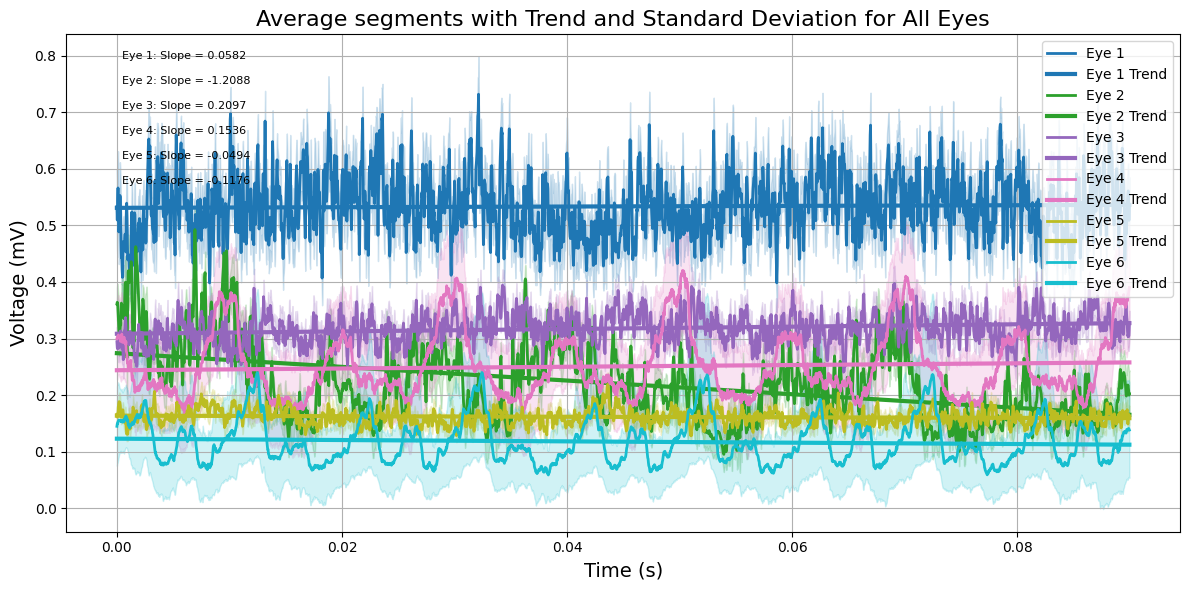

In [13]:

segments_all_eyes = [
    collect_and_average_segments(all_data_3D, eye_index=0, start=905+300, sa_length=2700, offset=3000, no_sa=99),
    collect_and_average_segments(all_data_3D, eye_index=1, start=430+300, sa_length=2700, offset=3000, no_sa=99),
    collect_and_average_segments(all_data_3D, eye_index=2, start=1850+300, sa_length=2700, offset=3000, no_sa=99),
    collect_and_average_segments(all_data_3D, eye_index=3, start=480+300, sa_length=2700, offset=3000, no_sa=99),
    collect_and_average_segments(all_data_3D, eye_index=4, start=2635+300, sa_length=2700, offset=3000, no_sa=99),
    collect_and_average_segments(all_data_3D, eye_index=5, start=1455+300, sa_length=2700, offset=3000, no_sa=99)
]

# Plot average SAs with standard deviation for all eyes
plot_average_all_eyes(segments_all_eyes)


/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_73047/1621341767.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('tab10', n_eyes)  # tab10 has distinct colors, useful for multiple eyes


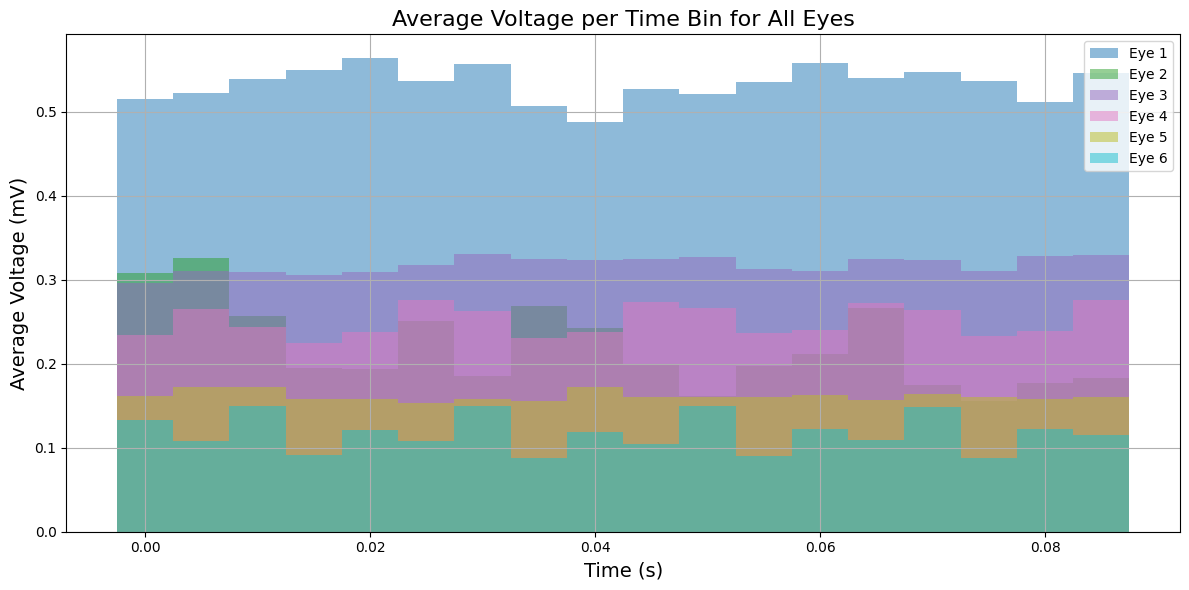

In [128]:
plot_average_voltage_histogram(segments_all_eyes)

### In time

In [14]:
def segment_over_time(all_data, eye_index, start, sa_length, offset, no_sa):
    scaler = StandardScaler()
    data_std = scaler.fit_transform(all_data[eye_index].T).T

    data = abs(data_std)
    
    average_for_segments = []
    for i in range(no_sa):
        temp_avg = []
        
        for channel in range(data.shape[0]):
            channel_data = data[channel]
            end_index = start + sa_length + i * offset
            if end_index <= len(channel_data):
                sa = channel_data[start + i * offset: end_index]
                temp_avg.append(np.mean(sa))
        average_for_segments.append(np.mean(temp_avg))

    average_for_segments= np.array(average_for_segments)
    
    return average_for_segments

In [15]:
segments_all_eyes_over_time = [
    segment_over_time(all_data_3D, eye_index=0, start=905+300, sa_length=2700, offset=3000, no_sa=99),
    segment_over_time(all_data_3D, eye_index=1, start=430+300, sa_length=2700, offset=3000, no_sa=99),
    segment_over_time(all_data_3D, eye_index=2, start=1850+300, sa_length=2700, offset=3000, no_sa=99),
    segment_over_time(all_data_3D, eye_index=3, start=480+300, sa_length=2700, offset=3000, no_sa=99),
    segment_over_time(all_data_3D, eye_index=4, start=2635+300, sa_length=2700, offset=3000, no_sa=99),
    segment_over_time(all_data_3D, eye_index=5, start=1455+300, sa_length=2700, offset=3000, no_sa=99)
]

/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_52980/2507508678.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('tab10', n_eyes)


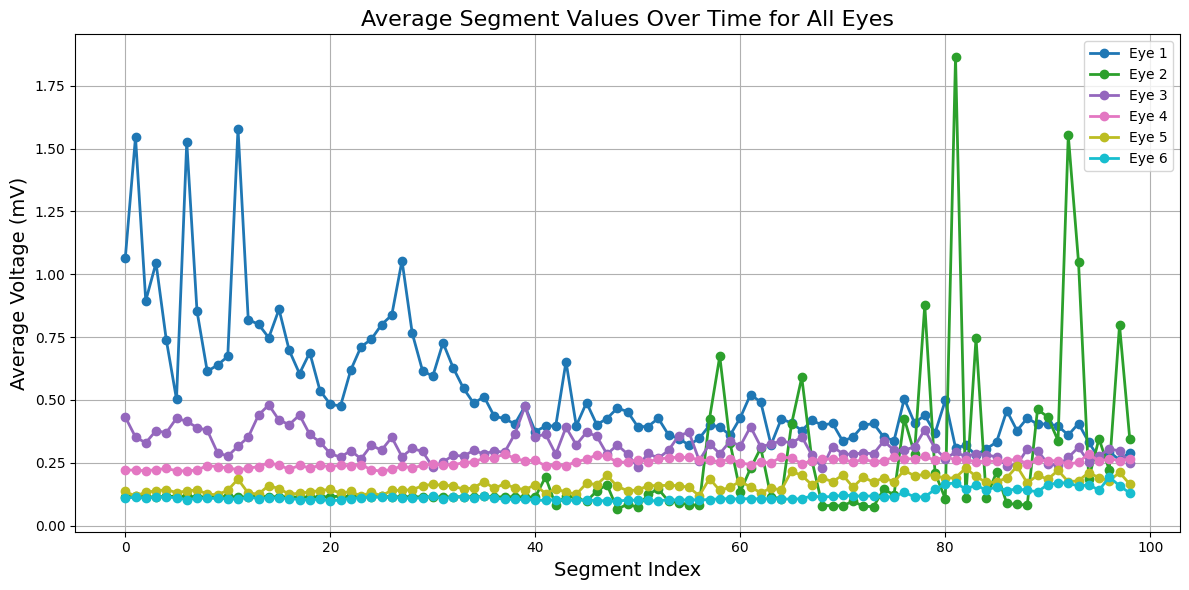

In [16]:
def plot_segment_over_time(segments_all_eyes_over_time):
    plt.figure(figsize=(12, 6))
    
    # Generate distinct colors for each eye
    n_eyes = len(segments_all_eyes_over_time)
    colormap = cm.get_cmap('tab10', n_eyes)
    
    # Plot each eye's average segment over time
    for eye_index, averages in enumerate(segments_all_eyes_over_time):
        # Generate x-axis values (segment indices)
        segment_indices = np.arange(len(averages))
        
        # Get a distinct color for the current eye
        eye_color = colormap(eye_index)
        
        # Plot the average values for the eye
        plt.plot(segment_indices, averages, marker='o', color=eye_color, label=f'Eye {eye_index + 1}', linewidth=2)

    # Add titles and labels
    plt.title(f"Average Segment Values Over Time for All Eyes", fontsize=16)
    plt.xlabel('Segment Index', fontsize=14)
    plt.ylabel('Average Voltage (mV)', fontsize=14)

    # Legend entries for each eye
    plt.legend(loc='upper right', fontsize=10)
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_segment_over_time(segments_all_eyes_over_time)
